# K means clustering

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=42)

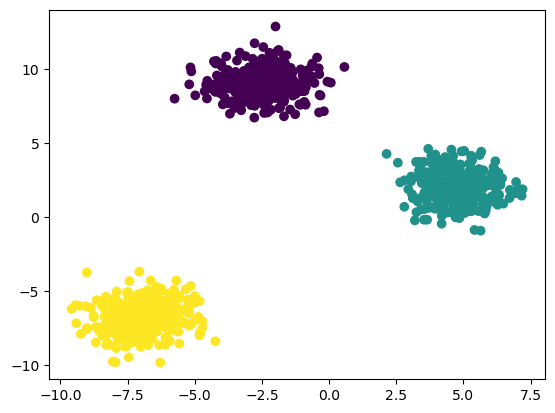

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [5]:
from sklearn.cluster import KMeans

In [6]:
#finding value of K 
#Elbow  method

In [7]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [10]:
wcss  #(Within-Cluster Sum of Square).

[44450.72387542039,
 12741.823357662124,
 1329.7219815435353,
 1174.443502551951,
 1006.1550511388473,
 852.4536245324063,
 751.6925101450975,
 672.0478027476298,
 592.7286307054678,
 544.9275831862083]

([<matplotlib.axis.XTick at 0x7f1ea22876a0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

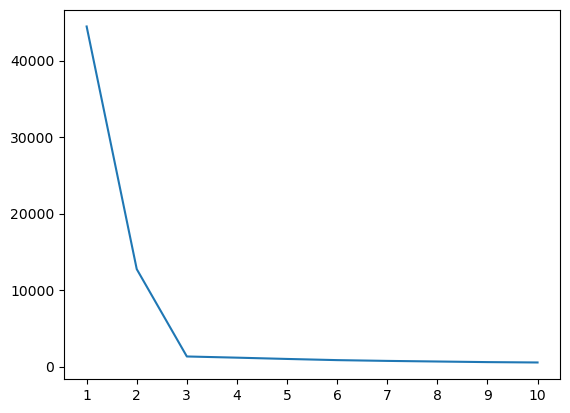

In [11]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))

### so the value of k is 3

In [12]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [13]:
y_labels=kmeans.fit_predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


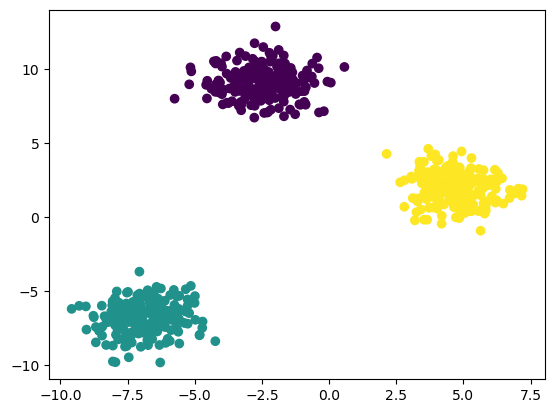

In [14]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [15]:
y_pred=kmeans.predict(X_test)

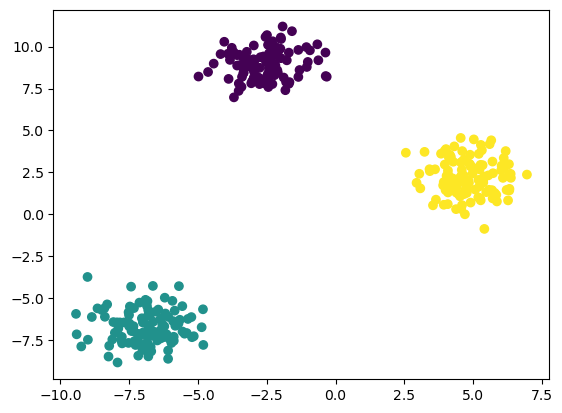

In [16]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [17]:
#using kne locater

In [18]:
!pip install kneed

In [19]:
from kneed import KneeLocator

In [20]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [21]:
#performance 
kmeans.labels_

array([2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0,
       1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2,
       2, 0, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0,
       1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0,
       0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 1, 1, 2,
       0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2,
       0, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0,
       2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2,
       1, 1, 2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 0, 1,
       1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1,
       2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0,

In [22]:
y_labels

array([2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0,
       1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2,
       2, 0, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0,
       1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0,
       0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 1, 1, 2,
       0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2,
       0, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0,
       2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2,
       1, 1, 2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 0, 1,
       1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1,
       2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0,

In [23]:
from sklearn.metrics  import silhouette_score

In [24]:
silhouette_score(X_train,kmeans.labels_)

0.8417121581954964

In [25]:
silhouette_score(X_test,y_test)

0.8474252274614565

In [26]:
silhouette_score(X_test,y_pred)

0.8474252274614565

In [27]:
y_test

array([0, 2, 2, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0,
       0, 1, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 2, 2, 1,
       0, 2, 1, 1, 0, 2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1, 1, 0, 2, 1, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 2, 1,
       1, 1, 0, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 2, 1, 1,
       2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1,
       0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 1,
       0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2, 1,
       1, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 2, 0, 1,
       2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 2, 1, 0, 1,
       0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2,

In [28]:
y_pred

array([0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0,
       0, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 1, 1, 2,
       0, 1, 2, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2,
       2, 2, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 1, 2, 2,
       1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2,
       0, 0, 1, 1, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 2,
       0, 2, 1, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 1, 0,
       1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2,
       2, 2, 1, 2, 1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2,
       1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       0, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1,

# Hierarichal Clustering 

In [29]:
from sklearn import datasets

In [30]:
iris_d=datasets.load_iris()

In [31]:
df=pd.DataFrame(iris_d.data)

In [32]:
df.columns=iris_d.feature_names

In [40]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(df)

In [43]:
X=X_scaled
y=iris_d.target

In [44]:
X[1:23]

array([[-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648],
       [-0.53717756,  1.47939788, -1.2833891 , -1.3154443 ],
       [-1.26418478,  0.78880759, -1.22655167, -1.3154443 ],
       [-1.26418478, -0.13197948, -1.34022653, -1.44707648],
       [-1.87002413, -0.13197948, -1.51073881, -1.44707648],
       [-0.05250608,  2.16998818, -1.45390138, -1.3154443 ],
       [-0.17367395,  3.09077525, -1.2833891 , -1.05217993],
       [-0.53717756,  1.93979142, -1.39706395, -1.05217993],
       [-0.90068117,  1.

In [45]:
X.shape

(150, 4)

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca=PCA(n_components=2)

In [48]:
pca_scaled=pca.fit_transform(X)

In [49]:
pca_scaled[1:23]

array([[-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367]])

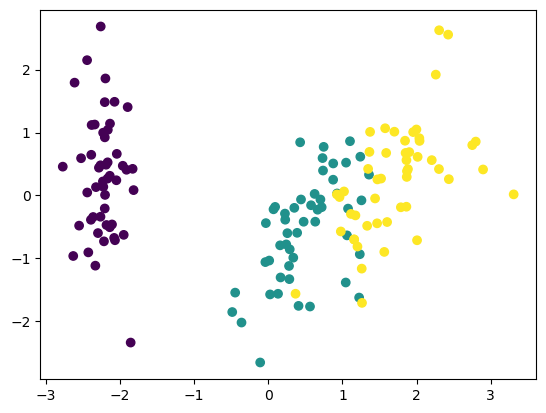

In [50]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=y)

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(pca_scaled,y,test_size=0.33,random_state=42)

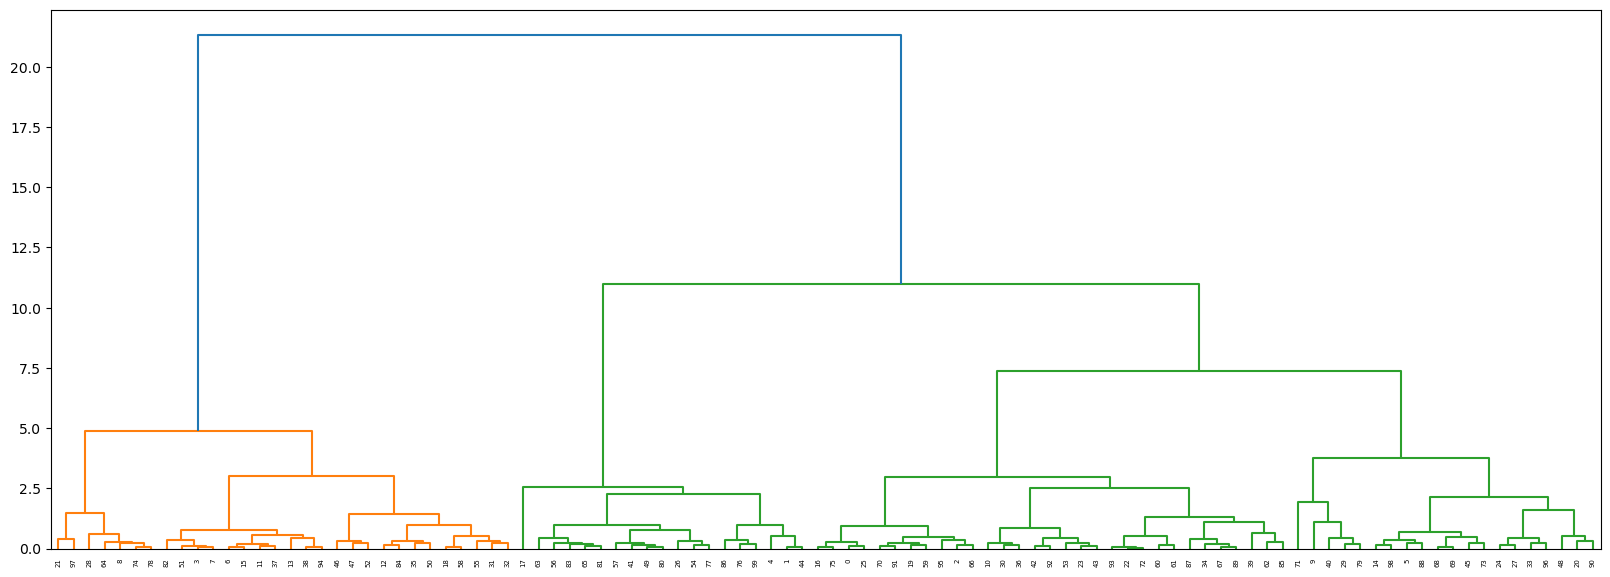

In [52]:
plt.figure(figsize=(20,7))
import scipy.cluster.hierarchy as sc
sc.dendrogram(sc.linkage(X_train,method='ward'))
plt.show()

In [53]:
from sklearn.cluster import AgglomerativeClustering

In [54]:
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [55]:
cluster.fit(pca_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

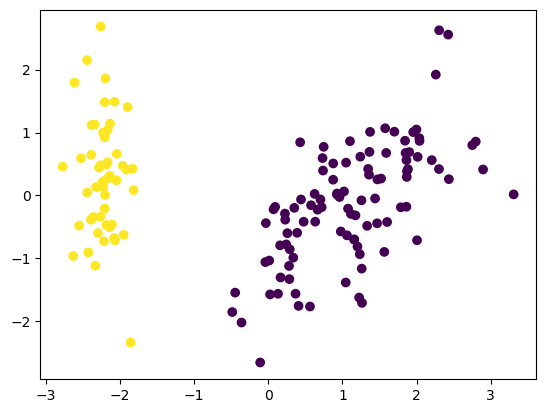

In [56]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [57]:
silhouette_score(X_scaled,cluster.labels_)

0.5817500491982808

# DBSCAN Clustering

In [58]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [59]:
X,y=make_moons(n_samples=250,noise=0.05)

In [60]:
y

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1])

In [61]:
X_scaled=scaler.fit_transform(X)

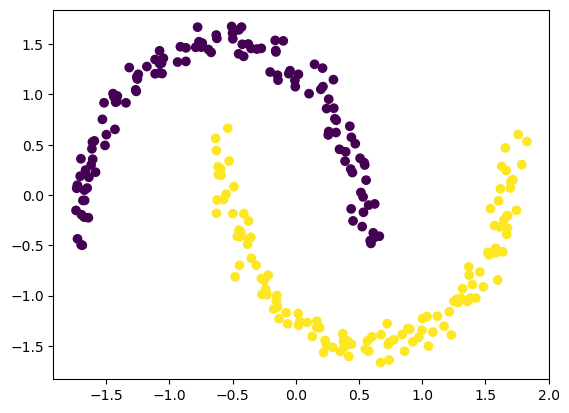

In [62]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=y)

In [63]:
dbscan=DBSCAN(eps=0.5)

In [64]:
dbscan.fit(X_scaled)

DBSCAN()

In [65]:
dbscan.labels_

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1])

In [66]:
y

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1])

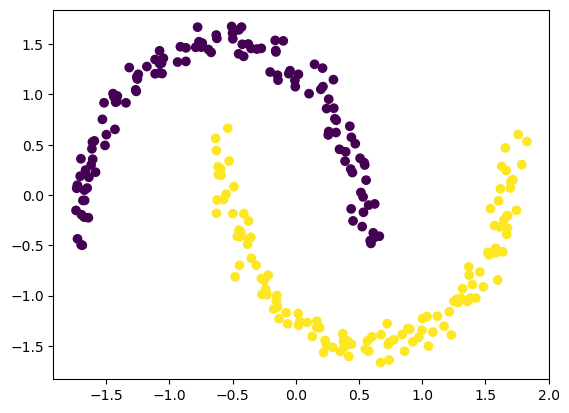

In [67]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=dbscan.labels_)